# Toxic Tweets Dataset - NLP Problem


In [ ]:
# Reading data from csv

In [2]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
from typing import Union



# Data pre processing and Cleaning:

In [9]:

df = pd.read_csv(r"D:\Sahithi\guvi\Final_project_guvi\project_2\FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [10]:
df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [11]:
len(df)

56745

In [12]:
df.shape

(56745, 3)

In [13]:
def drop(DataFrame: object, columns: Union[str,list]):
    try:
        DataFrame.drop(columns,axis=1,inplace=True)
        print(f'successfully dropped "{columns}" columns')
    except Exception as e:
        print(e)

In [14]:
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [15]:
drop(df,'Unnamed: 0')
df.head()

successfully dropped "Unnamed: 0" columns


,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# NLP

In [16]:
import nltk
#nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import pdb

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
tokenizer = RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

,Toxicity,tweet,cleaned_tweet,sentiment
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...,negative
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...,positive
2,0,bihday your majesty,bihday majesty,neutral
3,0,#model i love u take with u all the time in ...,model love u take u time urð ð ð ð ð ð ð ð,positive
4,0,factsguide: society now #motivation,factsguide society motivation,neutral
...,...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie 8220 lifeasking 20_pearls corey_ema...,positive
56741,1,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy,negative
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...,positive
56743,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie,positive


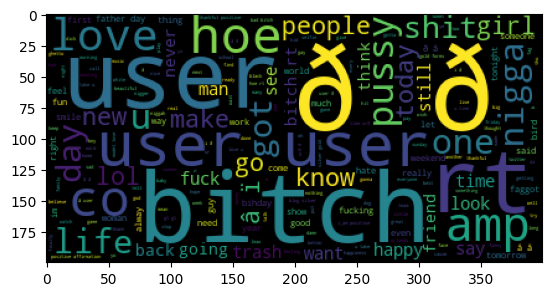

In [18]:
tweets = df['tweet'].str.lower()
clean_tweets = []
sentiments = []
for tweet in tweets:
    tokens = tokenizer.tokenize(tweet)
    cleaned_tokens = []
    for token in tokens:
        if token not in stop_words:
            cleaned_tokens.append(lemmatizer.lemmatize(token))
    clean_tweet = " ".join(cleaned_tokens)
    blob = TextBlob(clean_tweet)
    if blob.sentiment.polarity>0:
        sentiment = "positive"
    elif blob.sentiment.polarity<0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    sentiments.append(sentiment)
    clean_tweets.append(clean_tweet)
df['cleaned_tweet']= clean_tweets
df['sentiment']=sentiments
cloud = WordCloud()
cloud.generate(" ".join(df['cleaned_tweet'].values))
plt.imshow(cloud)
df

# Applying TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
model = TfidfVectorizer(max_features=5000)
result = model.fit_transform(clean_tweets)

result = result.toarray()
result = pd.DataFrame(result, columns = model.get_feature_names_out())
print(result)

        00  000  0221   05   06   08   10  100  1000  100046729  ...   ¼ð  \
0      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
1      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
2      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
3      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
4      0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
...    ...  ...   ...  ...  ...  ...  ...  ...   ...        ...  ...  ...   
56740  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
56741  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
56742  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
56743  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   
56744  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0        0.0  ...  0.0   

        ½â   ½ï   ½ð   ¾â   ¾ï   ¾ð   à¹   ï¼   ó¾  
0      0.0  0.0  0.0  

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()
result_sparse = model.fit_transform(clean_tweets)

# Create a sparse DataFrame directly from the sparse matrix
result_df = pd.DataFrame.sparse.from_spmatrix(result_sparse, columns=model.get_feature_names_out())

# Now you can work with the sparse DataFrame as needed
print(result_df)

        00  000  0000000000000  000001  001  003  007  007beardownjedi  \
0      0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
1      0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
2      0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
3      0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
4      0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
...    ...  ...            ...     ...  ...  ...  ...              ...   
56740  0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
56741  0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
56742  0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
56743  0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   
56744  0.0  0.0            0.0     0.0  0.0  0.0  0.0              0.0   

       007hertzrumble  007m_h  ...  ðºð¾ñ  ð¼ð  ð½ð  ð¾ð  ð¾ð½ð  ð¾ð½ðµð  ð¾ñ  \
0                 0.0     0.0 

# Training data using different classifiers and evaluating metrics

In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Decision Tree classifier and metrics

***************Train*****************
Accuracy : 0.9998898581372808
Precision:  1.0
Recall :  0.9997406100850799
f1 score:  0.9998702882195761
***************Test**********
Accuracy : 0.931976385584633
Precision:  0.9278715864081718
Recall :  0.9126512200123027
f1 score:  0.9201984701261113


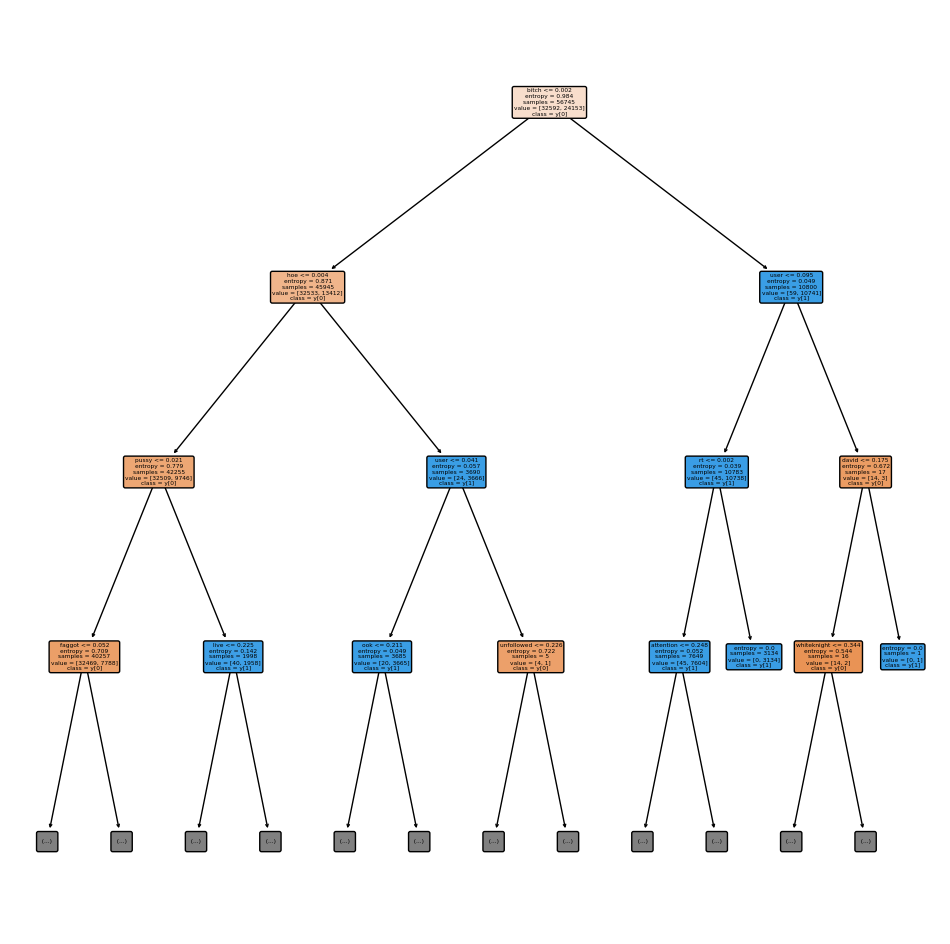

In [24]:
clean_tweets = df['cleaned_tweet']

# Use TfidfVectorizer to transform the text data
model = TfidfVectorizer()
X = model.fit_transform(clean_tweets)
y = df['Toxicity']
# Split the data into training and testing sets (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)
plt.figure(figsize=(12,12))
tree.plot_tree(clf, filled=True, rounded=True, class_names=True, feature_names=model.get_feature_names_out(), max_depth=3)

clf.fit(x_train,y_train)
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)
print("***************Train*****************")
print("Accuracy :",accuracy_score(y_train,train_pred))
print("Precision: ",precision_score(y_train,train_pred))
print("Recall : ",recall_score(y_train,train_pred))
print("f1 score: ",f1_score(y_train,train_pred))


print("***************Test**********")
print("Accuracy :",accuracy_score(y_test,test_pred))
print("Precision: ",precision_score(y_test,test_pred))
print("Recall : ",recall_score(y_test,test_pred))
print("f1 score: ",f1_score(y_test,test_pred))




confusion matrix :--------

In [25]:
y_pred = clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6126  346]
 [ 426 4451]]


RoC and AUC curve :--------

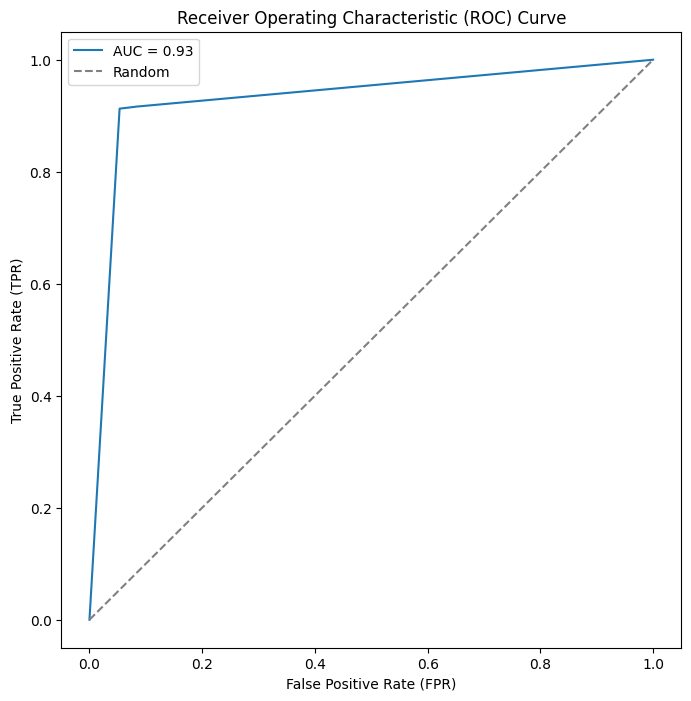

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained your decision tree classifier (clf) and made predictions on the test set (X_test)
y_scores = clf.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 2. Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators=100, random_state=42

In [37]:
from sklearn.ensemble import RandomForestClassifier

clean_tweets = df['cleaned_tweet']

# Use TfidfVectorizer to transform the text data
model = TfidfVectorizer()
X = model.fit_transform(clean_tweets)
y = df['Toxicity']
# Split the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(x_train,y_train)
train_pred_rf = rf_clf.predict(x_train)
test_pred_rf = rf_clf.predict(x_test)




In [38]:
print("***************Train*****************")
print("Accuracy :",accuracy_score(y_train,train_pred_rf))
print("Precision: ",precision_score(y_train,train_pred_rf))
print("Recall : ",recall_score(y_train,train_pred_rf))
print("f1 score: ",f1_score(y_train,train_pred_rf))

print("***************Test**********")
print("Accuracy :",accuracy_score(y_test,test_pred_rf))
print("Precision: ",precision_score(y_test,test_pred_rf))
print("Recall : ",recall_score(y_test,test_pred_rf))
print("f1 score: ",f1_score(y_test,test_pred_rf))

***************Train*****************
Accuracy : 0.9998898581372808
Precision:  1.0
Recall :  0.9997406100850799
f1 score:  0.9998702882195761
***************Test**********
Accuracy : 0.9384967838576086
Precision:  0.9379584992664012
Recall :  0.9175722780397786
f1 score:  0.927653399668325


In [39]:
y_pred = rf_clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6176  296]
 [ 402 4475]]


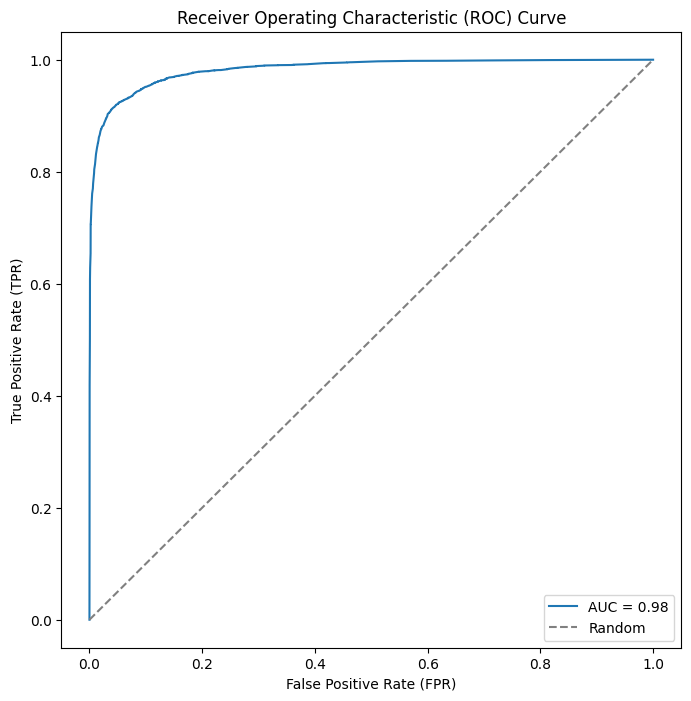

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained your decision tree classifier (clf) and made predictions on the test set (X_test)
y_scores = rf_clf.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 3. Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
clean_tweets = df['cleaned_tweet']

# Use TfidfVectorizer to transform the text data
model = TfidfVectorizer()
X = model.fit_transform(clean_tweets)
y = df['Toxicity']
# Split the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', probability=True,random_state=42)
svm_clf.fit(x_train,y_train)
train_pred_svm = svm_clf.predict(x_train)
test_pred_svm = svm_clf.predict(x_test)

In [48]:
print("***************Train*****************")
print("Accuracy :",accuracy_score(y_train,train_pred_svm))
print("Precision: ",precision_score(y_train,train_pred_svm))
print("Recall : ",recall_score(y_train,train_pred_svm))
print("f1 score: ",f1_score(y_train,train_pred_svm))

print("***************Test**********")
print("Accuracy :",accuracy_score(y_test,test_pred_svm))
print("Precision: ",precision_score(y_test,test_pred_svm))
print("Recall : ",recall_score(y_test,test_pred_svm))
print("f1 score: ",f1_score(y_test,test_pred_svm))

***************Train*****************
Accuracy : 0.9759670455546744
Precision:  0.984959197823884
Recall :  0.9580307117659266
f1 score:  0.9713083497698883
***************Test**********
Accuracy : 0.9468675654242664
Precision:  0.9629549393414212
Recall :  0.9114209555054337
f1 score:  0.9364795112187928


In [49]:
y_pred = svm_clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6301  171]
 [ 432 4445]]


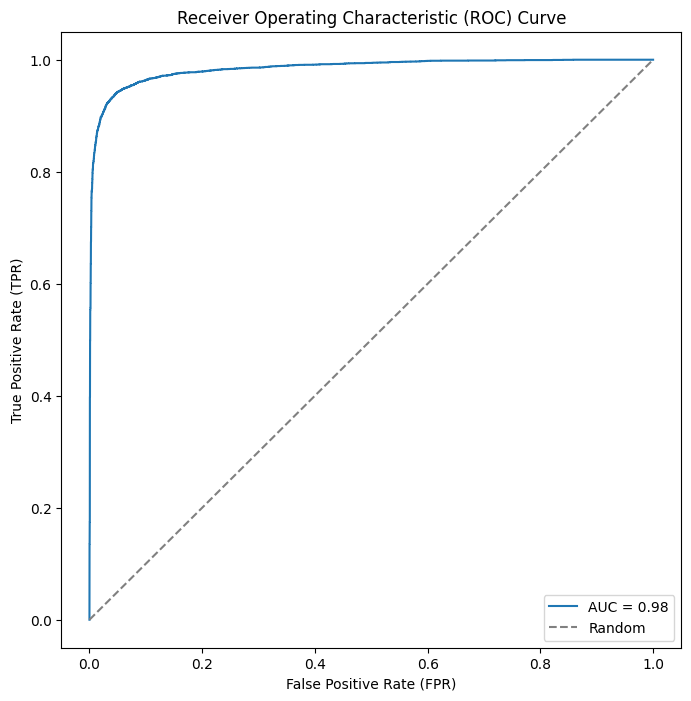

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained your decision tree classifier (clf) and made predictions on the test set (X_test)
y_scores = svm_clf.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 4. K-NN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier


In [78]:
clean_tweets = df['cleaned_tweet']

# Use TfidfVectorizer to transform the text data
model = TfidfVectorizer()
X = model.fit_transform(clean_tweets)
y = df['Toxicity']
# Split the data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train,y_train)
train_pred_knn = knn_clf.predict(x_train)
test_pred_knn = knn_clf.predict(x_test)

In [79]:
print("***************Train*****************")
print("Accuracy :",accuracy_score(y_train,train_pred_knn))
print("Precision: ",precision_score(y_train,train_pred_knn))
print("Recall : ",recall_score(y_train,train_pred_knn))
print("f1 score: ",f1_score(y_train,train_pred_knn))

print("***************Test**********")
print("Accuracy :",accuracy_score(y_test,test_pred_knn))
print("Precision: ",precision_score(y_test,test_pred_knn))
print("Recall : ",recall_score(y_test,test_pred_knn))
print("f1 score: ",f1_score(y_test,test_pred_knn))

***************Train*****************
Accuracy : 0.9898228918847476
Precision:  0.986904761904762
Recall :  0.9891575015563395
f1 score:  0.9880298476526065
***************Test**********
Accuracy : 0.6628777865891268
Precision:  0.9033000767459708
Recall :  0.24133688743079762
f1 score:  0.3809061488673139


In [80]:
y_pred = knn_clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6346  126]
 [3700 1177]]


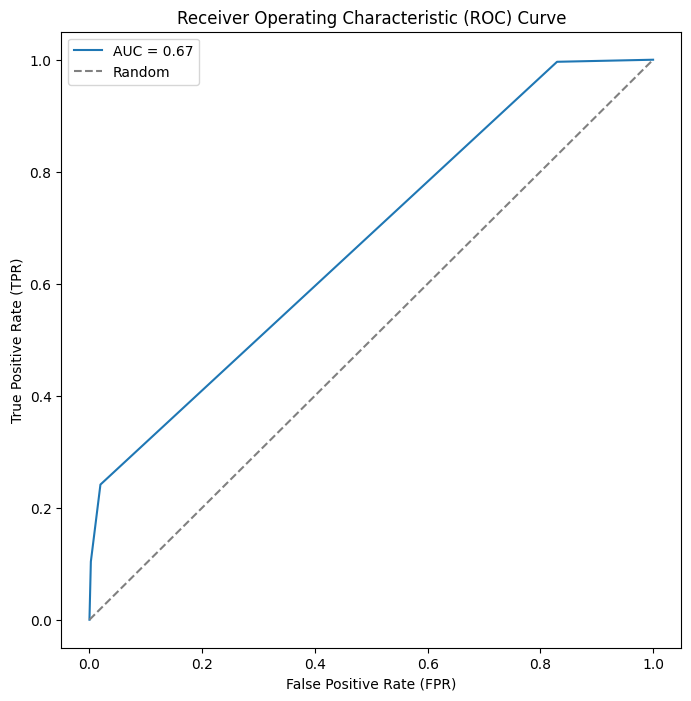

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained your decision tree classifier (clf) and made predictions on the test set (X_test)
y_scores = knn_clf.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()